<table>
    <tr>
        <td>
            <img src="https://arm.gov/uploads/TRACER_skyline.jpg" style="height: 200px;" alt="TRACER Campaign"></img>
        </td>
        <td>
            <h1>Atmospheric Radiation Measurement user facility (ARM)</h1>
            <h1>TRacking Aerosol Convection interations ExpeRiment (TRACER)</h1>
            <h2>July 16-19, 2022 Dust Event</h2>
            Notebook for data exploration of ARM aerosol and lidar data. </br>
            Corresponding Author: Adam Theisen (atheisen@anl.gov)
        </td>
    </tr>
</table>

## Overview
The first notebook in this series was an introduction to some of the features in ACT.  In this notebook, we will be exploring different types and data and bringing it all together to get a view of this dust event.

1. Micropulse Lidar (MPL) Data
1. Aerodynamic Particle Sizer (APS) Data
1. Visualizing Data
1. Questions for the User to Explore

## Prerequisites
This notebook will rely heavily on Python and the [Atmospheric data Community Toolkit (ACT)](https://github.com/ARM-DOE/ACT).  Don't worry if you don't have experience with either, this notebook will walk you though what you need to know.

You will also need an account and token to download data using the ARM Live webservice.  Navigate to the [webserive information page](https://adc.arm.gov/armlive/) and log in to get your token.  Your account username will be your ARM username.

| Concepts | Importance | Notes |
| --- | --- | --- |
| [ACT](https://github.com/ARM-DOE/ACT) | Helpful | |

- **Time to learn**: 60 Minutes
- **System requirements**:
    - Python 3.11 or latest
    - ACT v1.5.0 or latest
    - numpy
    - xarray
    - matplotlib

---

## Imports
Let's get started with some data!  But first, we need to import some libraries.

In [54]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

## Micropulse Lidar (MPL) Data
ARM has many value-added products (VAPs) that apply corrections, additional quality control, retrievals, and more.  These are a great way to get the data if you don't want to do the added processing yourself.  In this case, there is a VAP for the MPL with the datastream hou30smplcmask1zwangM1.c1 that you could utilize.  For this case though, let's download the instrument data and correct it ourselves using ACT.

In [2]:
# Set your username and token here!
username = 'theisen'
token = '500ad19936dd73a0'

# Set the datastream and start/enddates
datastream = 'houmplpolfsM1.b1'
startdate = '2022-07-16'
enddate = '2022-07-16'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] houmplpolfsM1.b1.20220716.000007.nc

If you use these data to prepare a publication, please cite:

Muradyan, P., Cromwell, E., Koontz, A., & Coulter, R. Micropulse Lidar
(MPLPOLFS). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1320657



In [3]:
# Let's read in the data using ACT and check out the data
ds_mpl = act.io.armfiles.read_netcdf(result)

# Now we can correct the data
ds_mpl = act.corrections.correct_mpl(ds_mpl)

In [4]:
# Let's plot up the data to see what it looks like. But first,
# if you look at the variables, you would see the the variable
# we're going to plot has range_bins as it's 2nd dimension.
# We want it to be height so we have to swap some coordinates around
ds_mpl.coords['height'] = ds_mpl.height
ds_mpl = ds_mpl.swap_dims({'range_bins': 'height'})

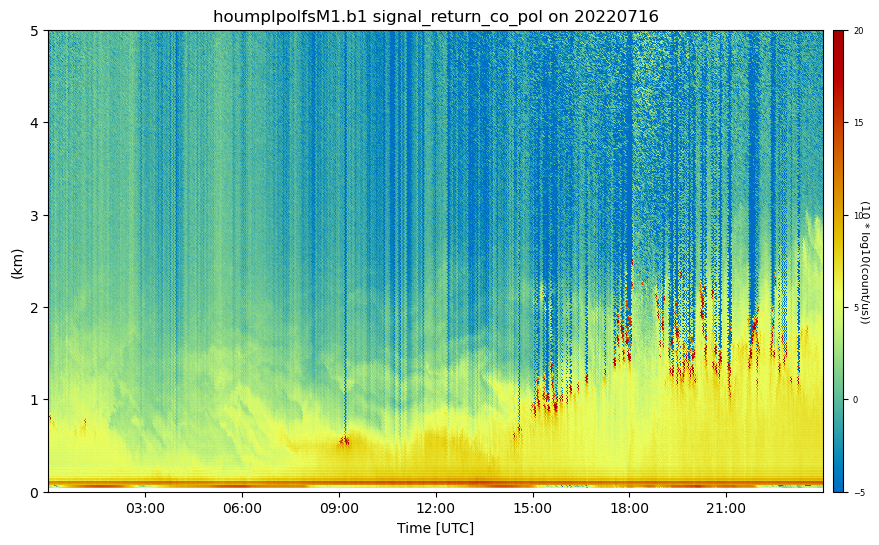

In [5]:
# It's a lot of data, sp it will take some time!
display = act.plotting.TimeSeriesDisplay(ds_mpl, figsize=(10, 6))
display.plot('signal_return_co_pol', cb_friendly=True, vmin=-5, vmax=20)

# This instrument collects data over 30 km so let's constrain
# this to just the lower 5 km
display.set_yrng([0, 5])
plt.show()

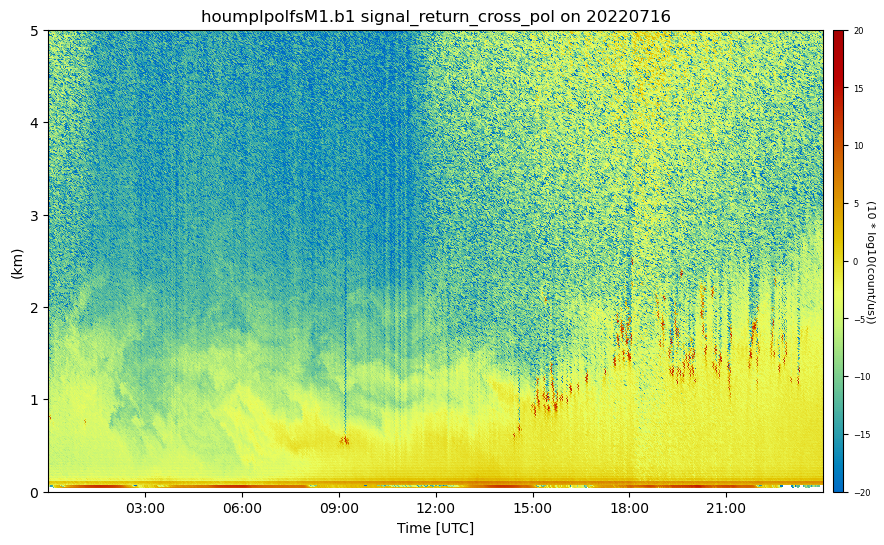

In [6]:
# Let's look at the cross polarization to get some more information
# It's a lot of data, sp it will take some time!
display = act.plotting.TimeSeriesDisplay(ds_mpl, figsize=(10, 6))
display.plot('signal_return_cross_pol', cb_friendly=True, vmin=-20, vmax=20)

# This instrument collects data over 30 km so let's constrain
# this to just the lower 5 km
display.set_yrng([0, 5])
plt.show()

## Aerosol Particle Size Data
Dust particles are generally under 10 µm or 10,000 nm and ARM has a variety of instruments that measure different across different ranges. The chart below shows the ranges for each instrument and where we can expect to see the dust particles.

<img src="./images/aerosol_sizing.png" width=600>

In [7]:
# Download the data as before
datastream = 'houaosapsM1.b1'
result = act.discovery.download_data(username, token, datastream, startdate, enddate)

# and read it in
ds_aps = act.io.armfiles.read_netcdf(result)

[DOWNLOADING] houaosapsM1.b1.20220716.000000.nc

If you use these data to prepare a publication, please cite:

Koontz, A., & Sedlacek, A. Aerodynamic Particle Sizer (AOSAPS). Atmospheric
Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1407135



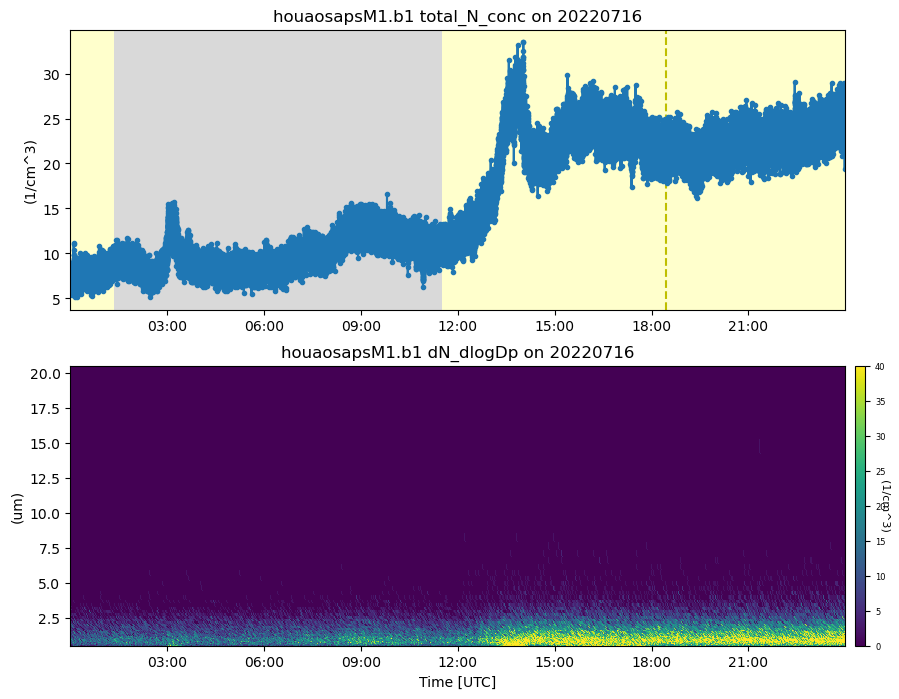

In [13]:
# Let's plot up the size distribution and number concentration
# These data are taken every second so it will take a little bit
display = act.plotting.TimeSeriesDisplay(ds_aps, subplot_shape=(2,), figsize=(10,8))
display.plot('total_N_conc', subplot_index=(0,))
display.day_night_background(subplot_index=(0,))
display.plot('dN_dlogDp', subplot_index=(1,), vmax=40)

plt.show()

## Visualizing Data Together
Let's start pulling these data together into the same plots so we can see what's going on.

In [33]:
# Let's start fresh and get all the data and maybe expand the dates
startdate = '2022-07-10'
enddate = '2022-07-20'

# MPL - Let's try the VAP this time
datastream = 'hou30smplcmask1zwangM1.c1'
result = act.discovery.download_data(username, token, datastream, startdate, enddate)
ds_mpl = act.io.armfiles.read_netcdf(result)

# APS
datastream = 'houaosapsM1.b1'
result = act.discovery.download_data(username, token, datastream, startdate, enddate)
ds_aps = act.io.armfiles.read_netcdf(result)

#ACSM
datastream = 'houaosacsmM1.b2'
result = act.discovery.download_data(username, token, datastream, startdate, enddate)
ds_acsm = act.io.armfiles.read_netcdf(result)

#PSAP
datastream = 'houaospsap3w1mM1.b1'
result = act.discovery.download_data(username, token, datastream, startdate, enddate)
ds_psap = act.io.armfiles.read_netcdf(result)

#SP2
datastream = 'houaossp2bc60sM1.b1'
result = act.discovery.download_data(username, token, datastream, startdate, enddate)
ds_sp2 = act.io.armfiles.read_netcdf(result)

# AOSMET
datastream = 'houmetM1.b1'
result = act.discovery.download_data(username, token, datastream, startdate, enddate)
ds_met = act.io.armfiles.read_netcdf(result)

[DOWNLOADING] hou30smplcmask1zwangM1.c1.20220718.000000.nc
[DOWNLOADING] hou30smplcmask1zwangM1.c1.20220719.000001.nc
[DOWNLOADING] hou30smplcmask1zwangM1.c1.20220714.000004.nc
[DOWNLOADING] hou30smplcmask1zwangM1.c1.20220715.000006.nc
[DOWNLOADING] hou30smplcmask1zwangM1.c1.20220710.000008.nc
[DOWNLOADING] hou30smplcmask1zwangM1.c1.20220711.000000.nc
[DOWNLOADING] hou30smplcmask1zwangM1.c1.20220712.000002.nc
[DOWNLOADING] hou30smplcmask1zwangM1.c1.20220716.000007.nc
[DOWNLOADING] hou30smplcmask1zwangM1.c1.20220713.000003.nc
[DOWNLOADING] hou30smplcmask1zwangM1.c1.20220717.000008.nc

If you use these data to prepare a publication, please cite:

Sivaraman, C., Flynn, D., Riihimaki, L., & Comstock, J. Cloud mask from
Micropulse Lidar (30SMPLCMASK1ZWANG). Atmospheric Radiation Measurement (ARM)
User Facility. https://doi.org/10.5439/1508389

[DOWNLOADING] houaosapsM1.b1.20220716.000000.nc
[DOWNLOADING] houaosapsM1.b1.20220717.000000.nc
[DOWNLOADING] houaosapsM1.b1.20220710.000000.nc
[DOWN

In [34]:
# Before we proceed to plotting, let's reduce the MPL data down a little bit
# This will remove all data where heights are greater than 5
ds_mpl = ds_mpl.where(ds_mpl.height < 5, drop=True)

# This will resample to 1 minute
ds_mpl = ds_mpl.resample(time='1min').nearest()

In [51]:
# Let's not forget about QCing the data!
# We can remove all the bad data from each aerosol dataset
ds_aps.clean.cleanup()
ds_aps = act.qc.arm.add_dqr_to_qc(ds_aps)
ds_aps.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

ds_acsm.clean.cleanup()
ds_acsm = act.qc.arm.add_dqr_to_qc(ds_acsm)
ds_acsm.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

ds_sp2.clean.cleanup()
ds_sp2 = act.qc.arm.add_dqr_to_qc(ds_sp2)
ds_sp2.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

ds_psap.clean.cleanup()
ds_psap = act.qc.arm.add_dqr_to_qc(ds_psap)
ds_psap.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


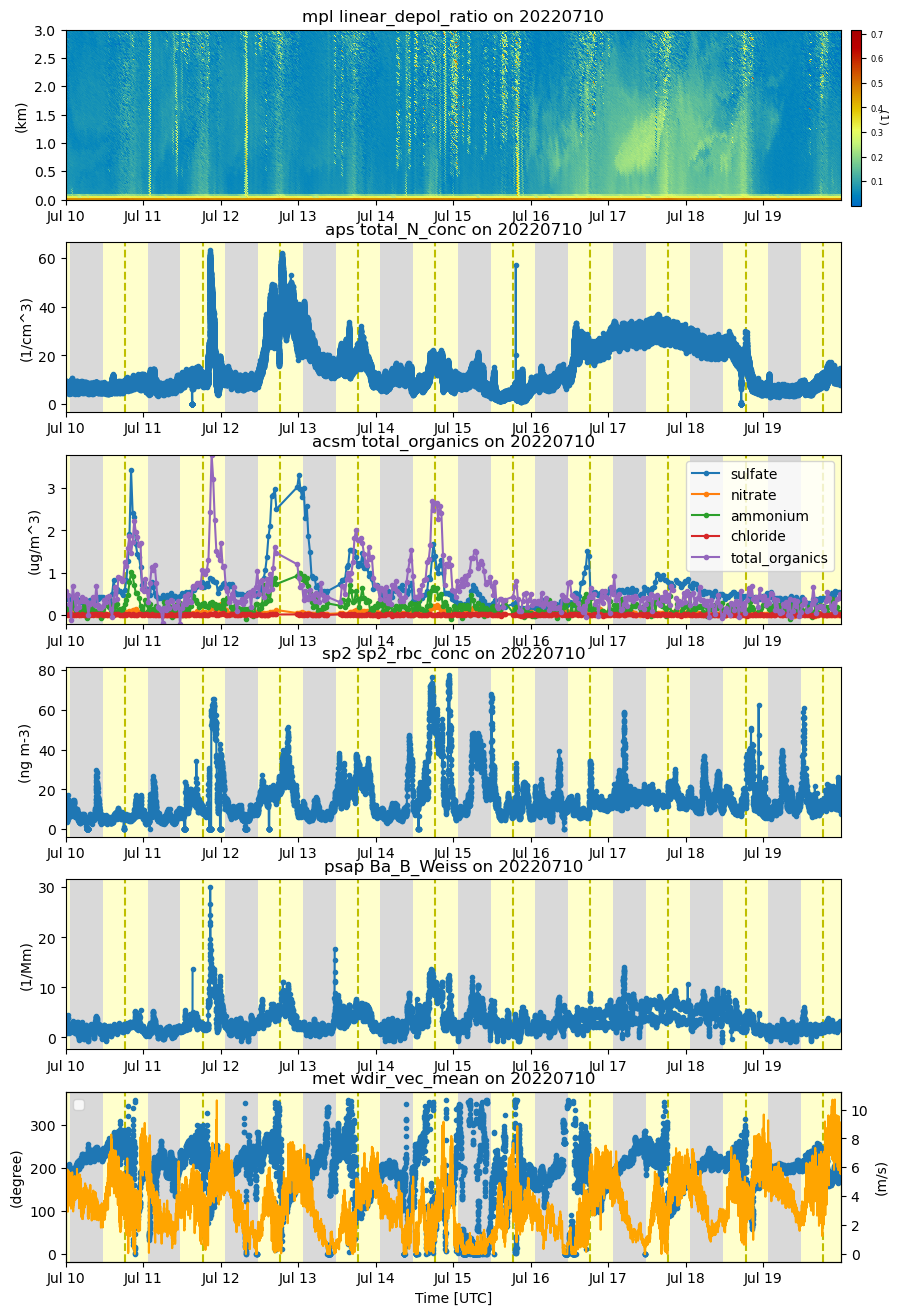

In [71]:
# We can pass a dictionary to the display objects with multiple datasets
# So let's plot all this up!
display = act.plotting.TimeSeriesDisplay({'aps': ds_aps, 'mpl': ds_mpl, 'acsm': ds_acsm, 'psap': ds_psap, 'sp2': ds_sp2, 'met': ds_met},
                                         subplot_shape=(6,), figsize=(10,16))

# MPL Plot
# Variable names of interest linear_depol_ratio, linear_depol_snr, backscatter_snr
display.plot('linear_depol_ratio', dsname='mpl', subplot_index=(0,), cb_friendly=True)#, vmax=25, vmin=0)
display.set_yrng([0, 3], subplot_index=(0,))

# APS Plot
display.plot('total_N_conc', dsname='aps', subplot_index=(1,))
display.day_night_background(dsname='aps', subplot_index=(1,))

# ACSM plot
display.plot('sulfate', dsname='acsm', subplot_index=(2,), label='sulfate')
display.plot('nitrate', dsname='acsm', subplot_index=(2,), label='nitrate')
display.plot('ammonium', dsname='acsm', subplot_index=(2,), label='ammonium')
display.plot('chloride', dsname='acsm', subplot_index=(2,), label='chloride')
display.plot('total_organics', dsname='acsm', subplot_index=(2,), label='total_organics')

display.day_night_background(dsname='acsm', subplot_index=(2,))

# SP2 Plot
display.plot('sp2_rbc_conc', dsname='sp2', subplot_index=(3,))
display.day_night_background(dsname='sp2', subplot_index=(3,))

# PSAP Plot
display.plot('Ba_B_Weiss', dsname='psap', subplot_index=(4,))
display.day_night_background(dsname='psap', subplot_index=(4,))

# AOSMET Wind Plot
display.plot('wdir_vec_mean', dsname='met', subplot_index=(5,), linestyle='', marker='.')
display.plot('wspd_vec_mean', dsname='met', subplot_index=(5,), marker=None, secondary_y=True, color='orange')
display.day_night_background(dsname='met', subplot_index=(5,))

plt.subplots_adjust(hspace=0.25)
plt.legend()
plt.savefig('./images/output.png')
plt.show()

### Try more data!

Go back and adjust the start/end date around this period and see how things change!  You can also try adding in some of the other instruments like the OPC (houaosopcM1.b1: calc_dust_weight or total_N_conc) or the NEPHDRY (houaosnephdry1mM1.b1: Bs_B_Dry_Neph3W).  You can find a full list of data products on the ARM TRACER [website](https://www.arm.gov/research/campaigns/amf2021tracer#:~:text=Order%20Data-,HOU%20DATA%20SOURCES,-NAME)

## Advanced Visualizations and Processing
Let's try and dive into the data a little more and see if there are any patterns in the data based on the direction of the wind.

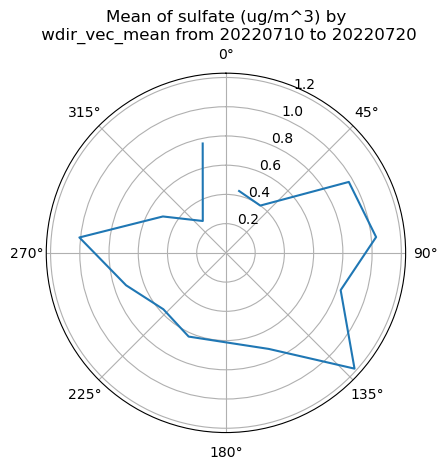

In [87]:
# We already should have the data loaded up so let's explore with some data roses
# First we need to combine data and to do that, we need to get it on the same time grid
ds_combined = xr.merge([ds_met.resample(time='30min').nearest(), ds_acsm.resample(time='30min').nearest()], compat='override')

# Plot out the data rose using the WindRose display object
display = act.plotting.WindRoseDisplay(ds_combined)
display.plot_data('wdir_vec_mean', 'wspd_vec_mean', 'sulfate', num_dirs=15, plot_type='line', line_plot_calc='mean')
plt.show()

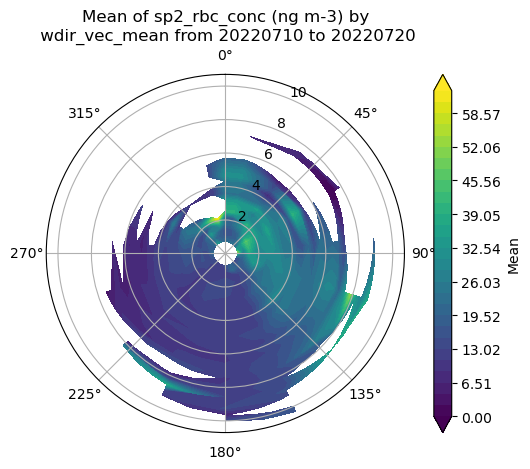

In [88]:
# First we need to combine data and to do that, we need to get it on the same time grid
ds_combined = xr.merge([ds_met.resample(time='1min').nearest(), ds_sp2.resample(time='1min').nearest()], compat='override')

# Plot out the data rose using the WindRose display object
display = act.plotting.WindRoseDisplay(ds_combined)
# Let's try a different type of data rose that will show the mean Black Carbon Concentration
# depending on wind direction and speed
display.plot_data('wdir_vec_mean', 'wspd_vec_mean', 'sp2_rbc_conc', num_dirs=15, plot_type='contour', contour_type='mean')
plt.show()

### Checkout the area
The AMF was deployed at [La Porte Municipal Airport](https://www.google.com/maps/place/Airport+Blvd/@29.6652378,-95.0466689,9165m/data=!3m1!1e3!4m7!3m6!1s0x863f6020e5e0ea21:0x792ee34f8eaac3e8!4b1!8m2!3d29.6663473!4d-95.0578571!16s%2Fg%2F1wbf_smp?entry=ttu).  Check out the google map and see if this mapes sense!

### Now back to the dust event!
Let's see if we can look at the lowest layers in the MPL data and see how they compare to the APS data.  For this, we can use simple matplotlib plots to investigate as well.

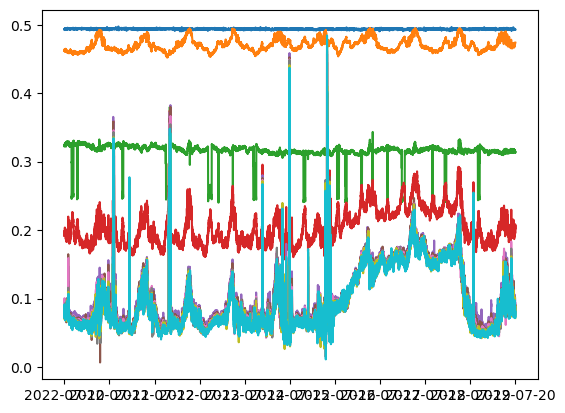

In [96]:
# Let's take a slice of the data to figure out where the signal
# may be showing up in the profile
data = ds_mpl['linear_depol_ratio'].values[:, 0:10]

fig, ax = plt.subplots()
ax.plot(ds_mpl['time'], data)
plt.show()

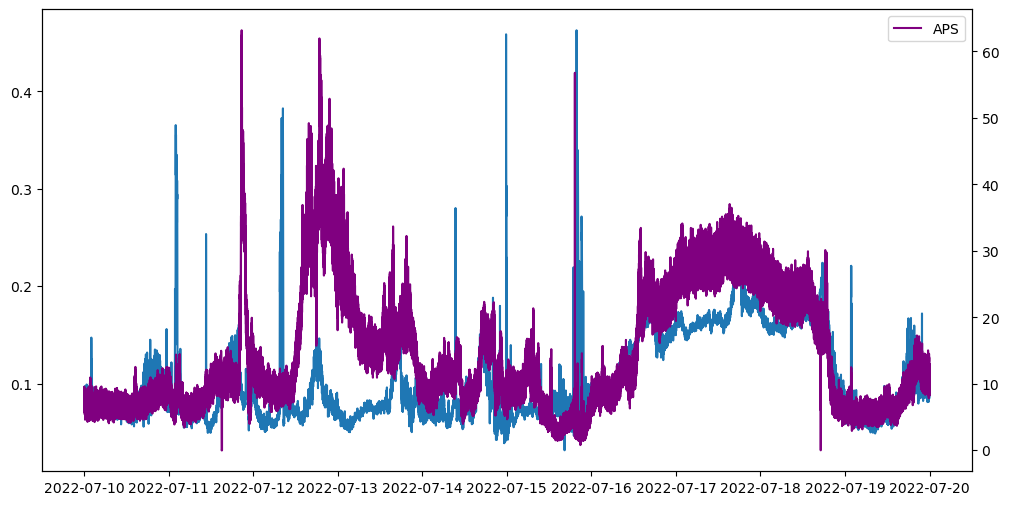

In [120]:
# Let's do it again and add in the APS data
# Other variables to try: backscatter_snr, linear_depol_snr, linear_depol_ratio
data = ds_mpl['linear_depol_snr'].values[:, 4]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(ds_mpl['time'], data, label='MPL LDR')

ax2 = ax.twinx()
ax2.plot(ds_aps['time'], ds_aps['total_N_conc'], color='purple', label='APS')
plt.legend()
plt.show()

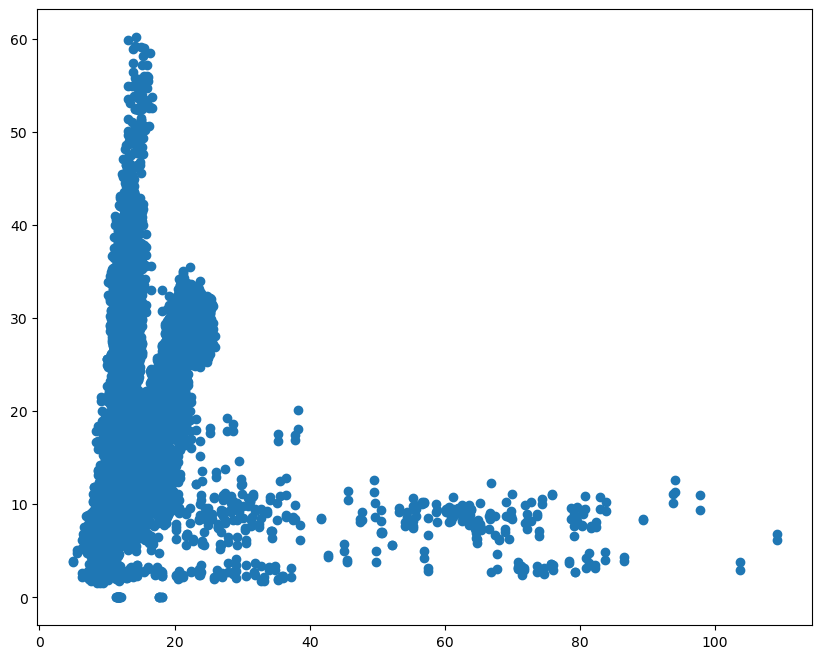

In [126]:
# Let's try a scatter plot using matplotlib
# First we need the data on the same time scale
ds_mpl2 = ds_mpl.resample(time='30s').nearest()
ds_aps2 = ds_aps.resample(time='30s').nearest()

ds = xr.merge([ds_mpl2, ds_aps2], compat='override')

# Other variables to try: backscatter_snr, linear_depol_snr, linear_depol_ratio
data = ds['linear_depol_snr'].values[:, 4]

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(data, ds['total_N_conc']) # , c=ds['linear_depol_snr'].values[:, 4])

plt.show()

---

## Questions for the User to Explore
Work in progress!

---

## Next Steps
The next notebook will help the users explore other datasets that can be utilized to analyze this dust event.  These include using data from the instruments previously noted here.

### Data Used in this Notebook
Ermold, B., & Flynn, C. Particle Soot Absorption Photometer (AOSPSAP3W1M). Atmospheric Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1225037

Jackson, R., & Sedlacek, A. Single Particle Soot Photometer (AOSSP2BC60S). Atmospheric Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1807910

Koontz, A., & Sedlacek, A. Aerodynamic Particle Sizer (AOSAPS). Atmospheric Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1407135

Kyrouac, J., & Shi, Y. Surface Meteorological Instrumentation (MET). Atmospheric Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1786358

Muradyan, P., Cromwell, E., Koontz, A., & Coulter, R. Micropulse Lidar (MPLPOLFS). Atmospheric Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1320657

Sivaraman, C., Flynn, D., Riihimaki, L., & Comstock, J. Cloud mask from Micropulse Lidar (30SMPLCMASK1ZWANG). Atmospheric Radiation Measurement (ARM)
User Facility. https://doi.org/10.5439/1508389

Zawadowicz, M., & Howie, J. Aerosol Chemical Speciation Monitor (AOSACSM). Atmospheric Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1762267